1. 연구논문과 학술자료
  - ArXiv : 머신러닝, 딥러닝,강화학습
  - Google Scholar Alerts : 특정주젱대해서 알림을 설정
  - Papare with code : 논문과 함께 구현된 코드 및 벤치마킹
2. 컨퍼런스
  - NeurIPS
  - ICML
  - IEEE ACCESS
3. 업계 블로그
  - Open AI
4. 기술뉴스와 커뮤니티
  - Reddit : 머신러닝 관련 서브레딧
5. sns & 뉴스레터
  - Twitter/X 유명한 연구자 팔로우
  - AI Breakfast

Google Mind(자가 학습 모델)
  - 개념 : 모델이 데이터에서 직접 학습하는 자가 조직화 알고리즘
  - 딥마인드

ML Ops
  - automl
  - 자동화
  - 전처리된 데이터를 사용가능한 모든 모델을 비교해서 최고의 성능을 가지는 - - 머신러닝을 찾기
  - Google AutoML
  - Auto-sklearn
  - H20.ai(H2O AutoML)
  - PyCaret


pycaret

In [20]:
!pip install pycaret

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 113.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 90.9 MB/s eta 0:00:00
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=f74c02bd667239dd9dc5ca3bbc2a73267ecd20f111c14e1f783a8b08d229df82
  Stored in directory: /root/

In [2]:
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import pandas as pd

In [3]:
data = data =load_iris(as_frame=True)
df = data.frame

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [9]:
# 분류모델로.. pycarat의 automl의 classification 사용하려면.. target : 'category'타입으로 변환
df['target'] = df['target'].astype('category')

In [11]:
# PyCarat을 설정
clf = setup(data=df, target='target')

,Description,Value
0,Session id,2500
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(150, 5)"
4,Transformed data shape,"(150, 5)"
5,Transformed train set shape,"(105, 5)"
6,Transformed test set shape,"(45, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [14]:
# 최적의 모델찾기
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0310
lda,Linear Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0310
knn,K Neighbors Classifier,0.9709,0.9974,0.9709,0.9777,0.9702,0.9559,0.9597,0.0460
lr,Logistic Regression,0.9527,0.0000,0.9527,0.9632,0.9517,0.9284,0.9344,0.0460
nb,Naive Bayes,0.9427,0.9919,0.9427,0.9520,0.9417,0.9133,0.9183,0.0330
rf,Random Forest Classifier,0.9345,0.9896,0.9345,0.9438,0.9333,0.9009,0.9065,0.3430
et,Extra Trees Classifier,0.9336,0.9922,0.9336,0.9448,0.9325,0.8995,0.9057,0.1610
dt,Decision Tree Classifier,0.9255,0.9429,0.9255,0.9329,0.9243,0.8872,0.8917,0.0530
gbc,Gradient Boosting Classifier,0.9255,0.0000,0.9255,0.9341,0.9246,0.8872,0.8920,0.2880
xgboost,Extreme Gradient Boosting,0.9245,0.9734,0.9245,0.9334,0.9234,0.8856,0.8907,0.0640


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:323: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  master_display_.apply(


In [15]:
# 최적의 모델
print(best_model)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


In [18]:
!pip install --upgrade pycaret

In [47]:
#평가 기준을 F1 스코어로 변경
K_FOLDS = 5
RANDOM_SEED = 42

clf = setup(data=df, target='target',session_id=RANDOM_SEED,)
top_model = compare_models(sort='F1',
                           fold=K_FOLDS,
                           n_select=11,
                           )

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(150, 5)"
4,Transformed data shape,"(150, 5)"
5,Transformed train set shape,"(105, 5)"
6,Transformed test set shape,"(45, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.9810,0.9959,0.9810,0.9833,0.9809,0.9714,0.9727,0.0340
qda,Quadratic Discriminant Analysis,0.9810,0.0000,0.9810,0.9833,0.9809,0.9714,0.9727,0.0320
lr,Logistic Regression,0.9714,0.0000,0.9714,0.9750,0.9713,0.9571,0.9590,0.0700
lda,Linear Discriminant Analysis,0.9714,0.0000,0.9714,0.9750,0.9713,0.9571,0.9590,0.0320
et,Extra Trees Classifier,0.9714,0.9959,0.9714,0.9750,0.9713,0.9571,0.9590,0.1760
lightgbm,Light Gradient Boosting Machine,0.9619,0.9796,0.9619,0.9643,0.9618,0.9429,0.9441,0.5720
rf,Random Forest Classifier,0.9524,0.9973,0.9524,0.9560,0.9522,0.9286,0.9305,0.2140
gbc,Gradient Boosting Classifier,0.9524,0.0000,0.9524,0.9560,0.9522,0.9286,0.9305,0.3060
knn,K Neighbors Classifier,0.9429,0.9952,0.9429,0.9452,0.9428,0.9143,0.9156,0.0820
dt,Decision Tree Classifier,0.9429,0.9571,0.9429,0.9476,0.9427,0.9143,0.9168,0.0360


Processing:   0%|          | 0/75 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:323: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  master_display_.apply(


In [48]:
top_model

[GaussianNB(priors=None, var_smoothing=1e-09),
 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                               store_covariance=False, tol=0.0001),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
     

In [50]:
tuned_model = tune_model(top_model[6], optimize='F1',
                         choose_better=True, fold=K_FOLDS);

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9524,1.0000,0.9524,0.9583,0.9521,0.9286,0.9317
1,0.9524,0.9932,0.9524,0.9583,0.9521,0.9286,0.9317
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9048,0.9932,0.9048,0.9048,0.9048,0.8571,0.8571
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9619,0.9973,0.9619,0.9643,0.9618,0.9429,0.9441
Std,0.0356,0.0033,0.0356,0.0351,0.0357,0.0535,0.0531


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [35]:
tuned_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [51]:
bagged_model = ensemble_model(tuned_model, optimize="F1",
                              fold=K_FOLDS)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9524,1.0000,0.9524,0.9583,0.9521,0.9286,0.9317
1,0.9524,1.0000,0.9524,0.9583,0.9521,0.9286,0.9317
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9048,0.9932,0.9048,0.9048,0.9048,0.8571,0.8571
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9619,0.9986,0.9619,0.9643,0.9618,0.9429,0.9441
Std,0.0356,0.0027,0.0356,0.0351,0.0357,0.0535,0.0531


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [52]:
boosted_model = ensemble_model(tuned_model, optimize="F1",
                               fold=K_FOLDS, method="Boosting")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9524,0.0000,0.9524,0.9583,0.9521,0.9286,0.9317
1,0.9524,0.0000,0.9524,0.9583,0.9521,0.9286,0.9317
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9048,0.0000,0.9048,0.9048,0.9048,0.8571,0.8571
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9619,0.0000,0.9619,0.9643,0.9618,0.9429,0.9441
Std,0.0356,0.0000,0.0356,0.0351,0.0357,0.0535,0.0531


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [53]:
best_model = top_model[0]

In [54]:
predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.9111,0.9852,0.9111,0.9155,0.9107,0.8667,0.8692


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,prediction_label,prediction_score
107,7.3,2.9,6.3,1.8,2,2,1.0000
63,6.1,2.9,4.7,1.4,1,1,0.9955
133,6.3,2.8,5.1,1.5,2,1,0.8472
56,6.3,3.3,4.7,1.6,1,1,0.6680
127,6.1,3.0,4.9,1.8,2,2,0.8964
140,6.7,3.1,5.6,2.4,2,2,1.0000
53,5.5,2.3,4.0,1.3,1,1,1.0000
69,5.6,2.5,3.9,1.1,1,1,1.0000
20,5.4,3.4,1.7,0.2,0,0,1.0000
141,6.9,3.1,5.1,2.3,2,2,1.0000


In [56]:
# 모델을 학습한 BEST PARAMETER
plot_model(best_model, plot="parameter")

,Parameters
priors,None
var_smoothing,1e-09


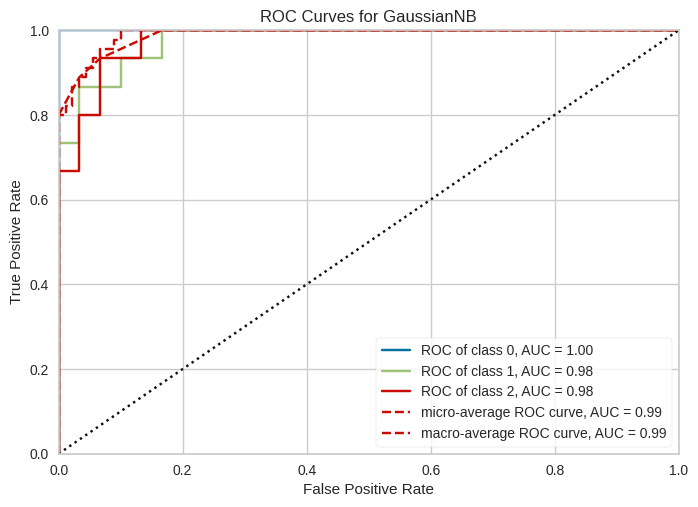

In [57]:
plot_model(best_model, plot="auc")

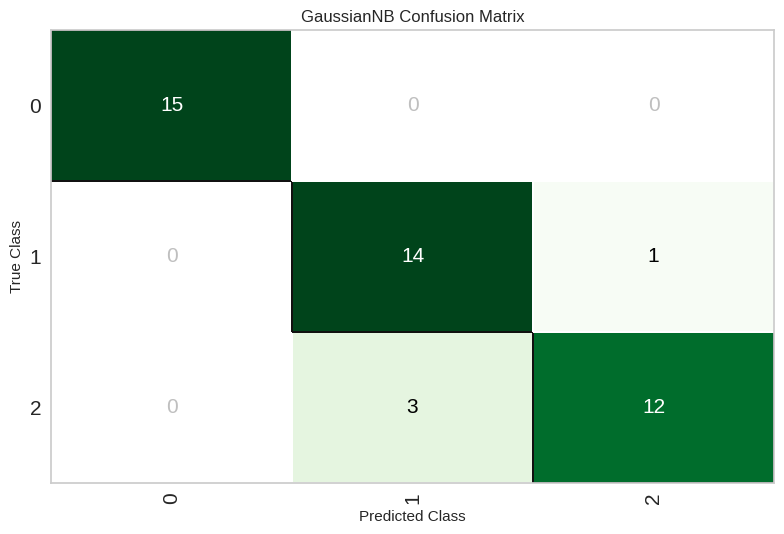

In [58]:
plot_model(best_model, plot="confusion_matrix")

https://nbviewer.org/github/pycaret/examples/tree/main/